In [66]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely 
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [71]:
N = 1000
data = pd.read_csv('data/MSOA_with_neighboors_'+str(N)+'.csv',index_col=0)
data = data[data['loneills_2018'] <= 6]
data = gpd.GeoDataFrame(data = data,
                            crs = 'epsg:27700', 
                            geometry = data['geometry'].apply(shapely.wkt.loads))


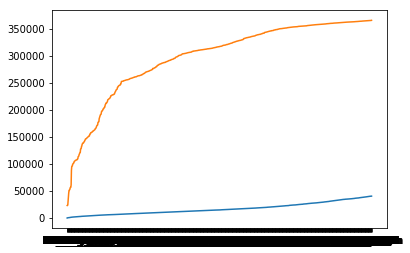

In [72]:
columns = data.columns[list(range(data.columns.get_loc('N0_length'),data.columns.get_loc('N'+ str(N-1)+'_length')))]
plt.plot(np.min(data[columns]))
plt.plot(np.max(data[columns]))

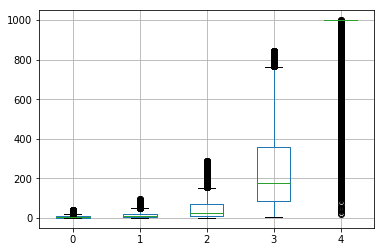

In [73]:
pd.DataFrame([(data[columns]<3000).sum(axis=1),
(data[columns]<5000).sum(axis=1),
(data[columns]<10000).sum(axis=1), 
(data[columns]<30000).sum(axis=1), 
(data[columns]<100000).sum(axis=1)]).transpose().boxplot()

4886


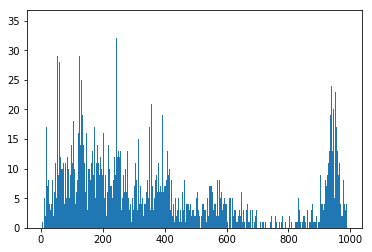

In [87]:
print(data.shape[0])
#fig = plt.hist((data[columns]<3000).sum(axis=1), bins=max((data[columns]<3000).sum(axis=1)))
#fig = plt.hist((data[columns]<5000).sum(axis=1), bins=max((data[columns]<3000).sum(axis=1)))
#fig2 = plt.hist((data[columns]<10000).sum(axis=1), bins=max((data[columns]<3000).sum(axis=1)))
fig2 = plt.hist((data[columns]<40000).sum(axis=1), bins=max((data[columns]<30000).sum(axis=1)))
#fig2 = plt.hist((data[columns]<100000).sum(axis=1), bins=max((data[columns]<3000).sum(axis=1)))